In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
PATH = "lab/data/"
df_ari_raw = pd.read_csv(f'{PATH}Credit.csv')
df_ari_raw = df_ari_raw.drop("Unnamed: 0", axis=1)
df_ari = pd.get_dummies(df_ari_raw)
df_ari_y = df_ari.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)  # making new column

df_cards_raw = pd.read_csv(f'{PATH}Credit.csv')
df_cards = df_cards_raw.drop("Unnamed: 0", axis=1)
df_cards = pd.get_dummies(df_cards)  # one hot encoding for category data
df_cards_y = df_cards.pop('Cards')

In [28]:
from sklearn.model_selection import train_test_split

classifiers_dict = {
    "Logistic Regression": LogisticRegression(max_iter=10),
    # "Logistic Regression": LogisticRegression(max_iter=100_000_000),
    "K Nearest Neighbors": KNeighborsClassifier(3),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
}

In [72]:
def plot_decision_boundary(df_X, df_y, predictor_1, predictor_2):
    i = 1
    figure = plt.figure(figsize=(27, 9))
    X, y = df_X[[predictor_1, predictor_2]], df_y

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[predictor_1].min() - 0.5, X[predictor_1].max() + 0.5
    y_min, y_max = X[predictor_2].min() - 0.5, X[predictor_2].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(2, len(classifiers_dict) + 1, i)
    # Plot the training points
    ax.scatter(X_train[predictor_1], X_train[predictor_2], c=y_train, cmap=cm_bright, edgecolors="k", alpha=0.6)
    # Plot the testing points
    ax.scatter(
        X_test[predictor_1], X_test[predictor_2], c=y_test, cmap=cm_bright, alpha=1, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for clf_name, clf in classifiers_dict.items():
        ax = plt.subplot(2, len(classifiers_dict) + 1, i)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.2, ax=ax, eps=0.5, response_method="predict",
        )

        # Plot the training points
        ax.scatter(
            X_train[predictor_1], X_train[predictor_2], c=y_train, cmap=cm_bright, edgecolors="k", alpha=0.6
        )
        # Plot the testing points
        ax.scatter(
            X_test[predictor_1],
            X_test[predictor_2],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=1,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.4f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

    plt.tight_layout()
    plt.show()

/home/gabriel/.config/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


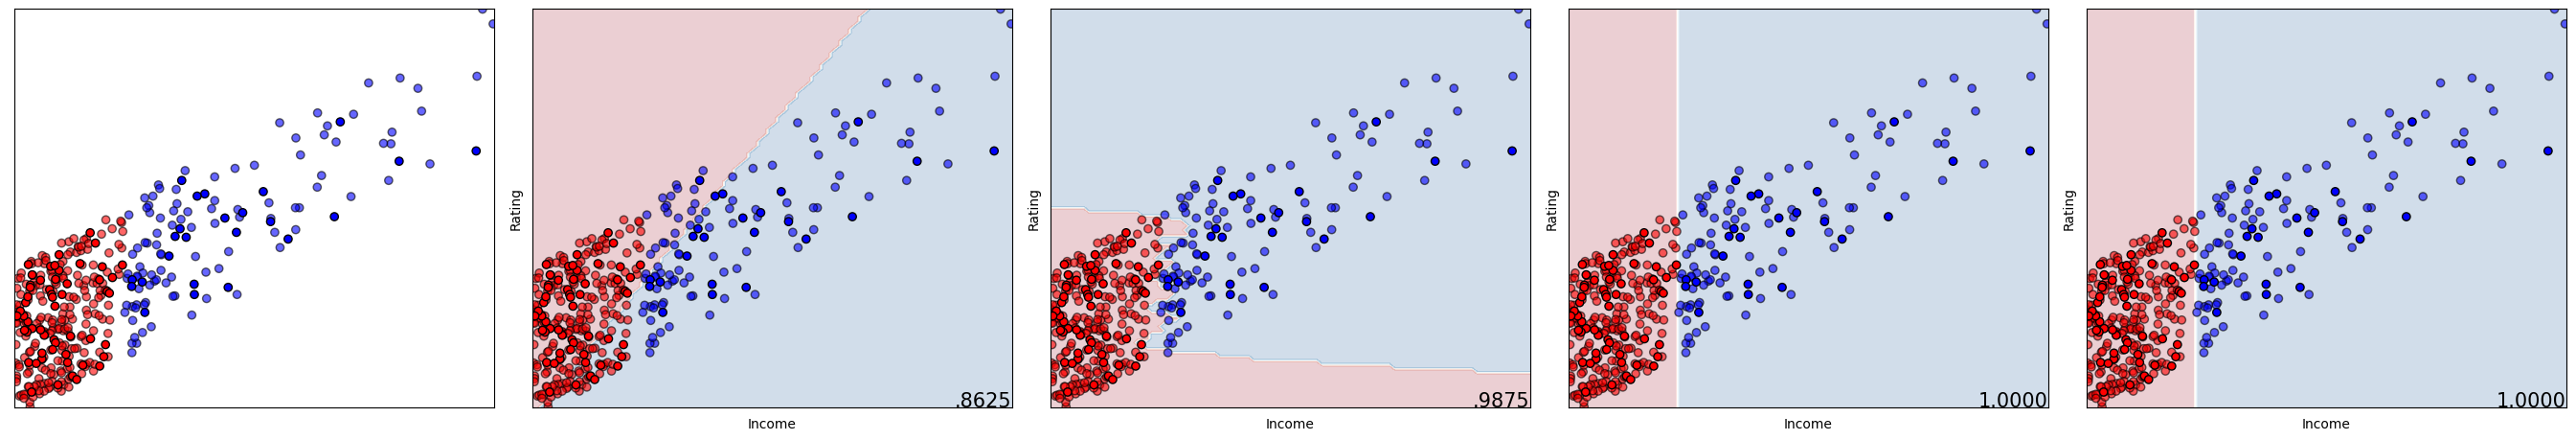

In [73]:
plot_decision_boundary(df_X=df_ari, df_y=df_ari_y, predictor_1="Income", predictor_2="Rating")

/home/gabriel/.config/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


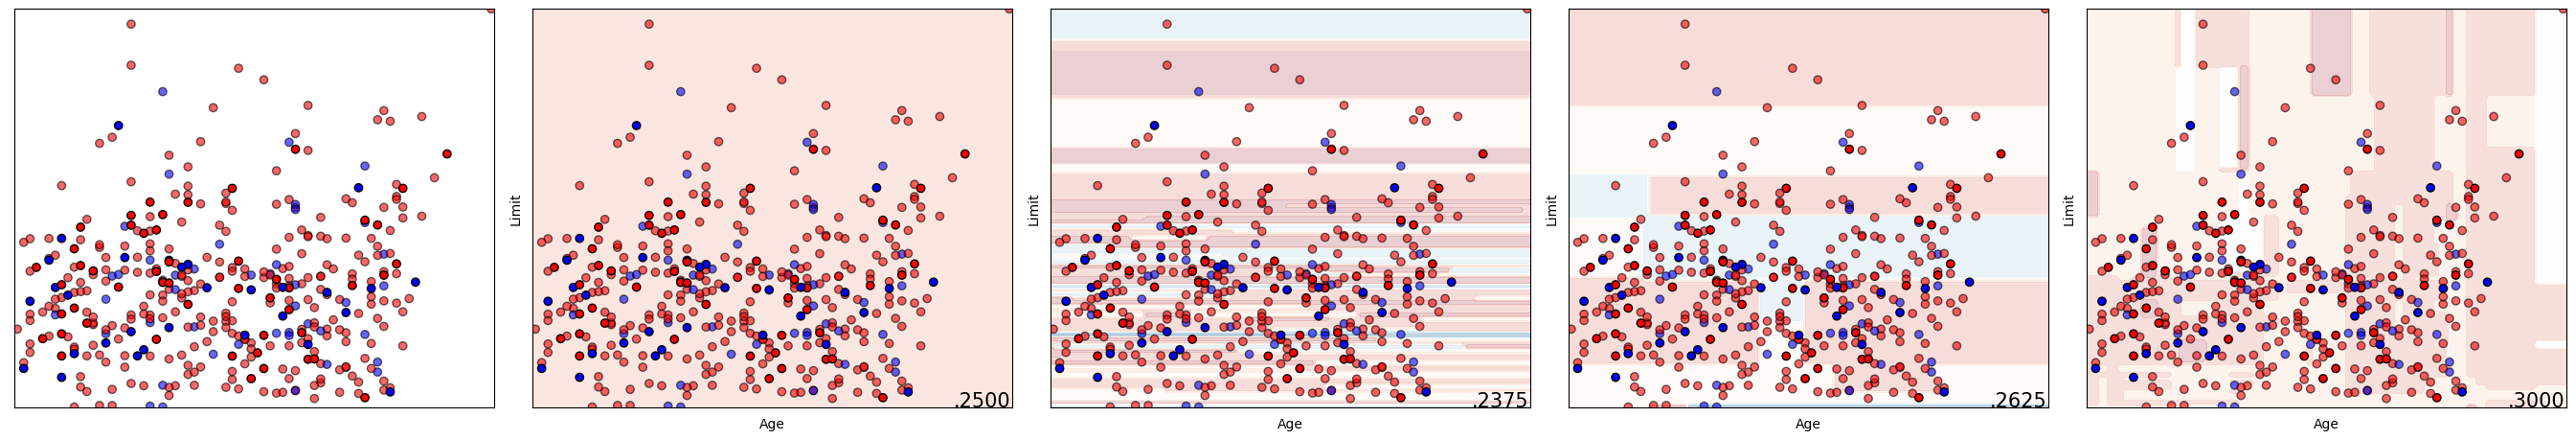

In [78]:
plot_decision_boundary(df_X=df_cards, df_y=df_cards_y, predictor_1="Age", predictor_2="Limit")